In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/titanic/gender_submission.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/train.csv


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
train = pd.read_csv('/kaggle/input/titanic/train.csv')
test = pd.read_csv('/kaggle/input/titanic/test.csv')

In [4]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [6]:
print(train.shape)
print(test.shape)

(891, 12)
(418, 11)


In [7]:
train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
test.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [9]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [10]:
train['Survived'].value_counts(normalize=True)

0    0.616162
1    0.383838
Name: Survived, dtype: float64

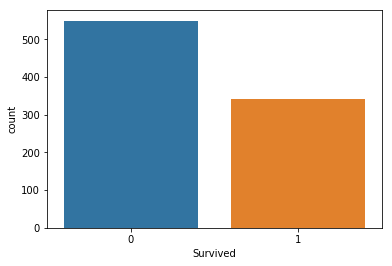

In [11]:
sns.countplot(train['Survived'])

In [12]:
train['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

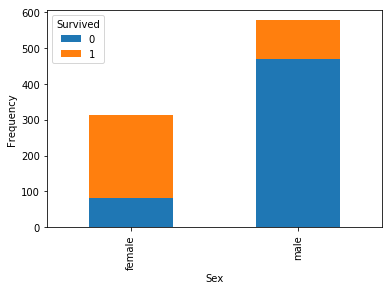

In [13]:
pd.crosstab(train['Sex'],train['Survived']).plot.bar(stacked=True)
plt.ylabel('Frequency')
plt.show()


Females rate of Survival is High when compared to the Males

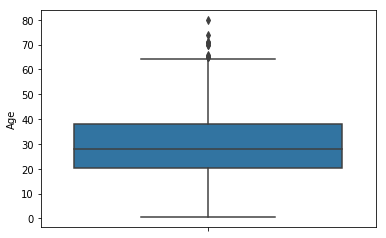

In [14]:
sns.boxplot(y=train['Age'])

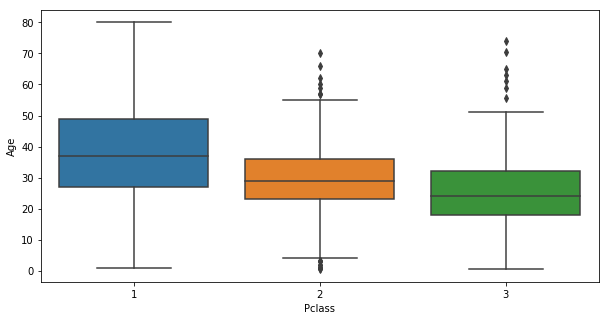

In [15]:
plt.figure(figsize=(10,5))
sns.boxplot(train['Pclass'],train['Age'])
plt.show()

The people in the Plcass 3(Lower Class) age median is around 25
The people in the Plcass 2(Middle Class) age median is around 29
The people in the Plcass 1(Upper Class) age median is around 38



In [16]:
train[train['Age']<1]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
78,79,1,2,"Caldwell, Master. Alden Gates",male,0.83,0,2,248738,29.0000,NaN,S
305,306,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S
469,470,1,3,"Baclini, Miss. Helene Barbara",female,0.75,2,1,2666,19.2583,NaN,C
644,645,1,3,"Baclini, Miss. Eugenie",female,0.75,2,1,2666,19.2583,NaN,C
755,756,1,2,"Hamalainen, Master. Viljo",male,0.67,1,1,250649,14.5000,NaN,S
803,804,1,3,"Thomas, Master. Assad Alexander",male,0.42,0,1,2625,8.5167,NaN,C
831,832,1,2,"Richards, Master. George Sibley",male,0.83,1,1,29106,18.7500,NaN,S


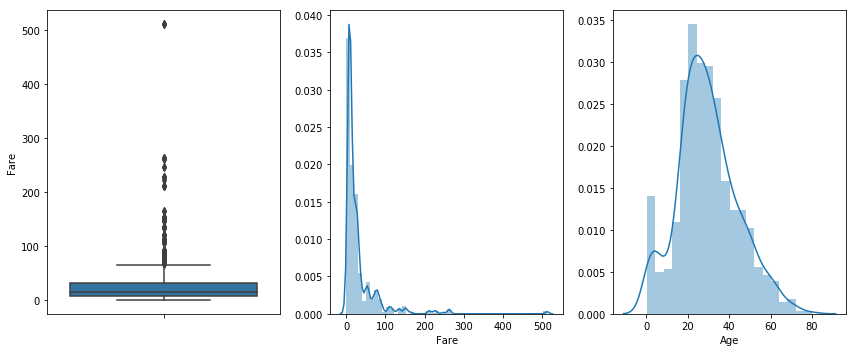

In [17]:
fix,ax = plt.subplots(1,3,figsize=(12,5))
sns.boxplot(y=train['Fare'],ax=ax[0])
sns.distplot(train['Fare'],ax=ax[1])
sns.distplot(train['Age'].dropna(),ax=ax[2])
plt.tight_layout()
plt.show()

In [18]:
train['Age'].skew()

0.38910778230082704

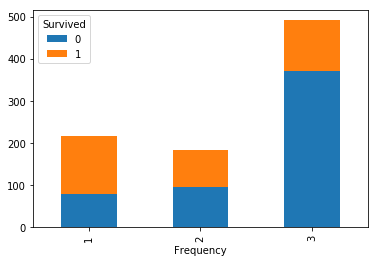

In [19]:
pd.crosstab(train['Pclass'],train['Survived']).plot.bar(stacked=True)
plt.xlabel('Frequency')
plt.show()

As we can see from that graph that ratio of people who died were from Pclass 3 (Lower class).
The Pclass 1(Upper class) has more number of Survivals when compared to the other class.

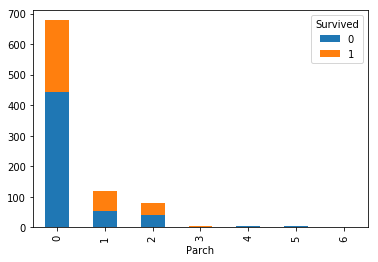

In [20]:
pd.crosstab(train['Parch'],train['Survived']).plot.bar(stacked=True)
plt.show()

The childeren who travelled with their nanny's have high deaths when compared to the
other parch.

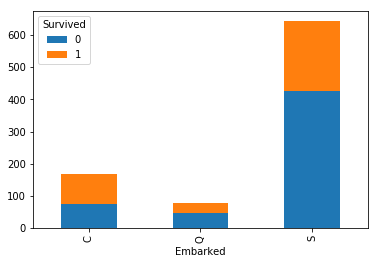

In [21]:
pd.crosstab(train['Embarked'],train['Survived'],).plot.bar(stacked=True)
plt.show()

The passengers who were in the embarked S i.e Southampton their death rate is high when compared to the other Port of Embarkation.

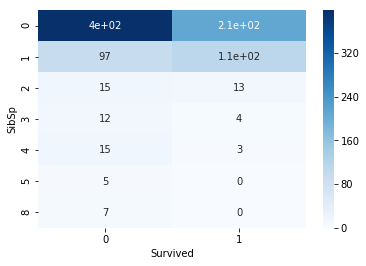

In [22]:
sns.heatmap(pd.crosstab(train['SibSp'],train['Survived']),annot=True,cmap='Blues')
plt.show()

The people who were travelling alone has less survival rate when compared to the people travelling with the family

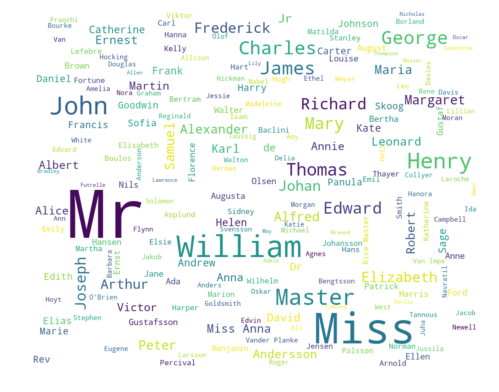

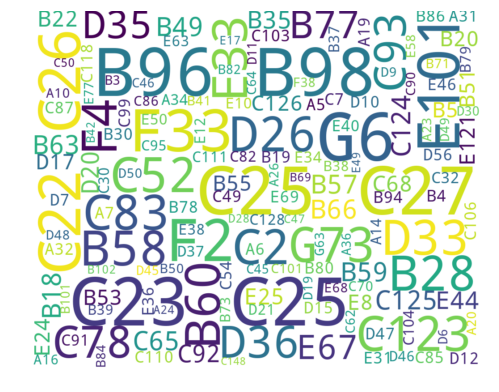

In [23]:
from wordcloud import WordCloud
for col in ['Name','Cabin']:
    
    text = " ".join(review for review in train[col].dropna())
    word = WordCloud(width=1000,height=800,margin=0,max_font_size=150,background_color='white').generate(text)

    plt.figure(figsize=[8,8])
    plt.imshow(word,interpolation='bilinear')
    plt.axis('off')
    plt.show()

In [24]:
#IQR method
for col in ['Age','Fare']:
    
    q1= train[col].quantile(0.25)
    q3 = train[col].quantile(0.75)
    iqr=q3-q1
    print(col,'IQR',iqr)

    upper_limit = q3+1.5*iqr
    lower_limit = q1-1.5*iqr
    print(col,'Upper limit for age',upper_limit)
    print(col,'Lower limit for age',lower_limit)

Age IQR 17.875
Age Upper limit for age 64.8125
Age Lower limit for age -6.6875
Fare IQR 23.0896
Fare Upper limit for age 65.6344
Fare Lower limit for age -26.724


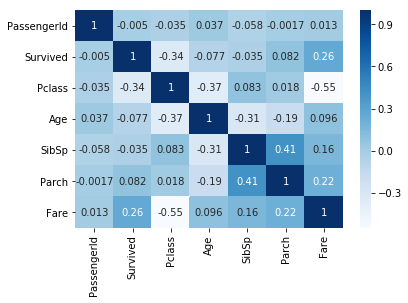

In [25]:
sns.heatmap(train.corr(),cmap='Blues',annot=True)
plt.show()

In [26]:
train_1 = train.copy()

In [27]:
age_median=train_1['Age'].median()
train_1['Age'] = train_1['Age'].fillna(age_median)

In [28]:
for col in train.columns:
    
    print(col,'Percentage of missing values',train[col].isna().sum()/train.shape[0]*100)

PassengerId Percentage of missing values 0.0
Survived Percentage of missing values 0.0
Pclass Percentage of missing values 0.0
Name Percentage of missing values 0.0
Sex Percentage of missing values 0.0
Age Percentage of missing values 19.865319865319865
SibSp Percentage of missing values 0.0
Parch Percentage of missing values 0.0
Ticket Percentage of missing values 0.0
Fare Percentage of missing values 0.0
Cabin Percentage of missing values 77.10437710437711
Embarked Percentage of missing values 0.22446689113355783


As the percentage of missing values is High for the cabin we will remove that column

In [29]:
train_1.drop(columns=['Cabin'],inplace=True)

In [30]:
from sklearn_pandas import CategoricalImputer
imputer = CategoricalImputer()
train_1['Embarked']=imputer.fit_transform(train['Embarked'])

In [31]:
train_1.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [32]:
#we will drop passengerid,Ticket,Name
train_1.drop(columns=['Name','Ticket','PassengerId'],inplace=True)

In [33]:
train_1 = pd.get_dummies(data=train_1,columns=['Sex','Embarked'],drop_first=True)
train_1.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


In [34]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier,VotingClassifier
from sklearn.naive_bayes import BernoulliNB,GaussianNB
from sklearn.svm import SVC

In [35]:
X = train_1.drop(columns=['Survived'],axis=1)
y= train_1['Survived']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(712, 8)
(179, 8)
(712,)
(179,)


In [36]:
model = DecisionTreeClassifier(max_depth=6,class_weight='balanced',random_state=0)
model.fit(X_train,y_train)
acc_decision_tree=model.score(X_train,y_train)*100
print(model.score(X_train,y_train))
print(model.score(X_test,y_test))

0.8637640449438202
0.8212290502793296


In [37]:
model.feature_importances_

array([0.11834973, 0.15487161, 0.05463228, 0.02111478, 0.14654857,
       0.49585071, 0.        , 0.00863232])

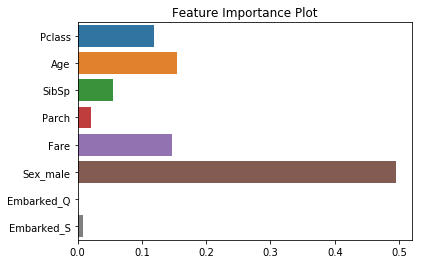

In [38]:
sns.barplot(x=model.feature_importances_,y=['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_male', 'Embarked_Q',
       'Embarked_S'])
plt.title('Feature Importance Plot')
plt.show()

In [39]:
model1  = LogisticRegression(class_weight='balanced',C=4.5,random_state=0)
model1.fit(X_train,y_train)
acc_logistic=model1.score(X_train,y_train)*100
print(model1.score(X_train,y_train))
print(model1.score(X_test,y_test))

0.7935393258426966
0.7877094972067039


/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [40]:
model2  = RandomForestClassifier(n_estimators=21,max_depth=6,criterion='gini',random_state=0,class_weight='balanced',
                                min_samples_split=2)
model2.fit(X_train,y_train)
acc_random_forest=model2.score(X_train,y_train)*100
print(model2.score(X_train,y_train))
print(model2.score(X_test,y_test))

0.8581460674157303
0.7988826815642458


In [41]:
rf  = RandomForestClassifier(n_estimators=1000,min_samples_split=30,min_samples_leaf=5,random_state=42,warm_start=True)
rf.fit(X_train,y_train)
acc_random_forest=rf.score(X_train,y_train)*100
print(rf.score(X_train,y_train))
print(rf.score(X_test,y_test))

0.851123595505618
0.8435754189944135


In [42]:
model2.feature_importances_

array([0.1209428 , 0.12803347, 0.05678189, 0.0531361 , 0.18976767,
       0.4132106 , 0.0158262 , 0.02230126])

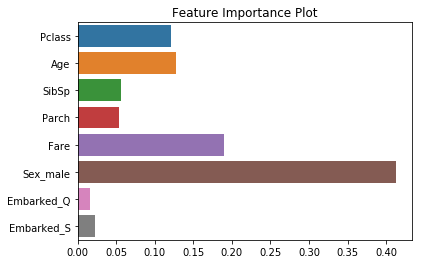

In [43]:
sns.barplot(x=model2.feature_importances_,y=['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_male', 'Embarked_Q',
       'Embarked_S'])
plt.title('Feature Importance Plot')
plt.show()

In [44]:
#Learning rate =0.01 got from the grid serach cv
model3 = AdaBoostClassifier(base_estimator=model2,random_state=0,learning_rate=0.001)
model3.fit(X_train,y_train)
acc_ada_boost=model3.score(X_train,y_train)*100
print(model3.score(X_train,y_train))
print(model3.score(X_test,y_test))

0.8693820224719101
0.8156424581005587


In [45]:
#from the Grid Searchcv I have got the parameters as 36,1,1
model4 =GradientBoostingClassifier(random_state=1,n_estimators=36,max_depth=1,learning_rate=1)
model4.fit(X_train,y_train)
acc_gradient_boost=model4.score(X_train,y_train)*100
print(model4.score(X_train,y_train))
print(model4.score(X_test,y_test))

0.8384831460674157
0.8379888268156425


In [46]:
# By gridsearch we have got the values for the hyperparameters
model5 = SVC(kernel='rbf',C=10,gamma=0.1,random_state=1)
model5.fit(X_train,y_train)
acc_svc=model5.score(X_train,y_train)*100
print(model5.score(X_train,y_train))
print(model5.score(X_test,y_test))

0.9297752808988764
0.7262569832402235


In [47]:
model6 = VotingClassifier(estimators=[('DT',model),('LR',model1),('RF',model2),('AD',model3),('GB',model4),('SVC',model5)],
                          voting='hard')
model6.fit(X_train,y_train)
acc_voting_classifier=model6.score(X_train,y_train)*100
print(model6.score(X_train,y_train))
print(model6.score(X_test,y_test))

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.8651685393258427
0.8044692737430168


In [48]:
from sklearn.ensemble import BaggingClassifier
bc = BaggingClassifier(base_estimator=model2,n_estimators=20,random_state=1)
bc.fit(X_train,y_train)
acc_Bagging_classifier=bc.score(X_train,y_train)*100
print(bc.score(X_train,y_train))
print(bc.score(X_test,y_test))

0.8637640449438202
0.8324022346368715


In [49]:
from sklearn.model_selection import GridSearchCV

parameters = [{'learning_rate':[0.01,0.1,0.001,1,5,10,20]}]
grid_search = GridSearchCV(estimator = model3,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10)
                           #n_jobs = -1)
grid_search = grid_search.fit(X_train, y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_


/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [50]:
print('Best Accuracy',best_accuracy)
print('Best Parameters',best_parameters)               

Best Accuracy 0.8300561797752809
Best Parameters {'learning_rate': 0.001}


In [51]:
from sklearn.model_selection import cross_val_score
for models  in [model,model1,model2,model3,model4,model5,model6,bc]:
    
    accuracies = cross_val_score(estimator = models, X = X_train, y = y_train, cv = 10)
    print(models,accuracies.mean())
    print(accuracies.std())

DecisionTreeClassifier(class_weight='balanced', criterion='gini', max_depth=6,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best') 0.8090699754080036
0.04419106889007506
LogisticRegression(C=4.5, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False) 0.7907595573440643
0.04596481070050442


/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  Futur

RandomForestClassifier(bootstrap=True, class_weight='balanced',
                       criterion='gini', max_depth=6, max_features='auto',
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=21, n_jobs=None, oob_score=False,
                       random_state=0, verbose=0, warm_start=False) 0.8287692823608317
0.031865755459096465
AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=RandomForestClassifier(bootstrap=True,
                                                         class_weight='balanced',
                                                         criterion='gini',
                                                         max_depth=6,
                                                         max_features='auto',
                                                    

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  Futur

VotingClassifier(estimators=[('DT',
                              DecisionTreeClassifier(class_weight='balanced',
                                                     criterion='gini',
                                                     max_depth=6,
                                                     max_features=None,
                                                     max_leaf_nodes=None,
                                                     min_impurity_decrease=0.0,
                                                     min_impurity_split=None,
                                                     min_samples_leaf=1,
                                                     min_samples_split=2,
                                                     min_weight_fraction_leaf=0.0,
                                                     presort=False,
                                                     random_state=0,
                                                     splitter='best')),
      

In [52]:
models = pd.DataFrame({
    'Model': ['Decision Tree','Logistic Regression','Random Forest','Adaboost Classifier','Gradient boost',
             'Support Vector Classifier','Voting Classifier','Bagging Classifier'],
    'Score': [acc_decision_tree,acc_logistic,acc_random_forest,acc_ada_boost,acc_gradient_boost,
             acc_svc,acc_voting_classifier,acc_Bagging_classifier]})
models.sort_values(by='Score', ascending=False)

,Model,Score
5,Support Vector Classifier,92.977528
3,Adaboost Classifier,86.938202
6,Voting Classifier,86.516854
0,Decision Tree,86.376404
7,Bagging Classifier,86.376404
2,Random Forest,85.112360
4,Gradient boost,83.848315
1,Logistic Regression,79.353933


In [53]:
test_1 = test.copy()
test_1['Age'] = test_1['Age'].fillna(test_1['Age'].median())
test_1['Fare'] = test_1['Fare'].fillna(test_1['Fare'].mean())
test_1.drop(columns=['Name','Ticket','PassengerId','Cabin'],inplace=True)

In [54]:
test_1.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S
2,2,male,62.0,0,0,9.6875,Q
3,3,male,27.0,0,0,8.6625,S
4,3,female,22.0,1,1,12.2875,S


In [55]:
test_1 = pd.get_dummies(data=test_1,columns=['Sex','Embarked'],drop_first=True)
test_1.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,3,34.5,0,0,7.8292,1,1,0
1,3,47.0,1,0,7.0000,0,0,1
2,2,62.0,0,0,9.6875,1,1,0
3,3,27.0,0,0,8.6625,1,0,1
4,3,22.0,1,1,12.2875,0,0,1


In [56]:
y_pred = rf.predict(test_1)
y_pred

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [57]:
submission = pd.DataFrame({
        "PassengerId": test["PassengerId"],
        "Survived": y_pred
    })
submission.to_csv('submission.csv', index=False)